In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import sys
!{sys.executable} -m pip install tensorflow

import os
for dirname, _, filenames in os.walk('../data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../data/raw/Emotion_final.csv


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
data = pd.read_csv('../data/raw/Emotion_final.csv')

In [5]:
data.columns

Index(['Text', 'Emotion'], dtype='object')

In [6]:
data.shape

(21459, 2)

In [7]:
data['Emotion'].value_counts()

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

In [8]:
results = data['Emotion'].value_counts()

In [9]:
results

happy       7029
sadness     6265
anger       2993
fear        2652
love        1641
surprise     879
Name: Emotion, dtype: int64

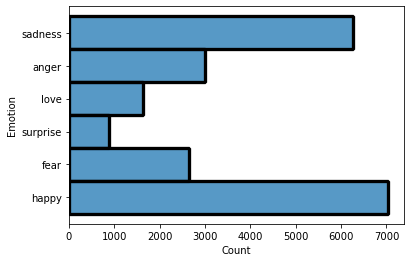

In [10]:
sns.histplot(data=data, y="Emotion")

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(data['Emotion'])

sentences = data['Text'].values


In [12]:
y

array([4, 4, 0, ..., 1, 1, 1])

In [13]:
sentences

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'Vincent was irritated but not dismay',
       'Kendall-Hume turned back to face the dismayed coup',
       'I am dismayed , but not surpris'], dtype=object)

In [14]:
sentences_train, sentences_test, y_train, y_test = train_test_split(
   sentences, y, test_size=0.25, random_state=1000)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<16094x16471 sparse matrix of type '<class 'numpy.int64'>'
	with 251088 stored elements in Compressed Sparse Row format>

In [48]:
y_train

array([5, 0, 3, ..., 1, 2, 2])

In [49]:
X_train.shape[1]

16471

In [50]:
input_dim = X_train.shape[1]

In [75]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential

model = keras.Sequential([
    layers.Dense(10, input_shape=(input_dim,), activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(6, activation='softmax')
])

In [76]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = 'accuracy',
)
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 10)                164720    
_________________________________________________________________
dropout_33 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 10)                40        
_________________________________________________________________
dense_42 (Dense)             (None, 10)                110       
_________________________________________________________________
dropout_34 (Dropout)         (None, 10)                0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 10)                40        
_________________________________________________________________
dense_43 (Dense)             (None, 10)               

In [77]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=100,
    epochs=10,
    verbose=1
)

Epoch 1/10


/home/apprenant/.local/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:447: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_8/dense_41/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_8/dense_41/embedding_lookup_sparse/Reshape:0", shape=(None, 10), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_8/dense_41/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


161/161 [==============================] - 1s 4ms/step - loss: 1.8992 - accuracy: 0.2456 - val_loss: 1.6266 - val_accuracy: 0.4725
Epoch 2/10
161/161 [==============================] - 1s 3ms/step - loss: 1.4217 - accuracy: 0.4710 - val_loss: 1.3527 - val_accuracy: 0.5562
Epoch 3/10
161/161 [==============================] - 1s 3ms/step - loss: 1.1766 - accuracy: 0.5819 - val_loss: 1.0870 - val_accuracy: 0.6153
Epoch 4/10
161/161 [==============================] - 1s 3ms/step - loss: 0.9869 - accuracy: 0.6572 - val_loss: 0.8393 - val_accuracy: 0.7487
Epoch 5/10
161/161 [==============================] - 1s 3ms/step - loss: 0.8502 - accuracy: 0.7192 - val_loss: 0.7271 - val_accuracy: 0.7761
Epoch 6/10
161/161 [==============================] - 1s 3ms/step - loss: 0.7473 - accuracy: 0.7564 - val_loss: 0.6571 - val_accuracy: 0.8000
Epoch 7/10
161/161 [==============================] - 1s 3ms/step - loss: 0.6735 - accuracy: 0.7858 - val_loss: 0.6233 - val_accuracy: 0.8011
Epoch 8/10
161/16

In [78]:
X_train

<16094x16471 sparse matrix of type '<class 'numpy.int64'>'
	with 251088 stored elements in Compressed Sparse Row format>

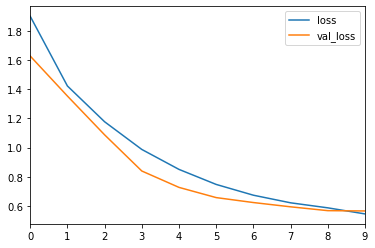

In [79]:

# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
